In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor






archivo=os.listdir()
archivo

['.ipynb_checkpoints',
 '03_d_Desafío_-_Modelos_de_ensamble__Parte_I_.pdf',
 '1_intento.ipynb',
 'Bagging Random Forest Ensamble OOB.zip',
 'boston.csv',
 'Boston.ipynb',
 'Desafío - Detección temprana de renuncias en empresa de telecomunicaciones.ipynb',
 'Ejercicio clase - Modelos de ensamble (Parte I).ipynb',
 'Guía de estudio - Modelos de ensamble (Parte I).pdf',
 'outliers_detectados.csv',
 'Presentación - Modelos de ensamble (Parte I) (1).pdf',
 'telecom_churn.csv',
 'util_bagging.py',
 '__pycache__']

In [57]:
df=pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Las variables presentes en el dataset son:

1. CRIM: tasa de delincuencia per cápita por ciudad
2. ZN: proporción de suelo residencial con parcelas de más de 25.000 pies cuadrados.
3. INDUS: proporción de acres comerciales no minoristas por ciudad
4. CHAS: variable ficticia Charles River (1 si la zona colinda con el río; 0 en caso contrario)
5. NOX: concentración de óxidos nítricos (partes por 10 millones).
6. RM: número medio de habitaciones por vivienda
7. EDAD: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
8. DIS: distancias ponderadas a cinco centros de empleo de Boston
9. RAD: índice de accesibilidad a autopistas radiales
10. TAX: tipo del impuesto sobre bienes inmuebles por cada 10.000 $ [$/10k].
11. PTRATIO: ratio alumnos-profesor por ciudad
12. B: resultado de la ecuación B=1000(Bk - 0,63)^2 donde Bk es la proporción de personas de color por ciudad
13. LSTAT: % de estatus inferior de la población

Variable de salida:
1) MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de $ [k$].

   Ajustaremos un modelo de ensamble Bagging y un Random Forest para datos de precios de viviendas de Boston, para comparar sus respectivos rendimients. Utilizaremos para esto una base de datos con información referente a las viviendas y el barrio en el que estan ubicadas. El objetivo es predecir el precio mediano de una vivienda, con la información de sus predictores.


In [59]:
 # Estructura de los datos 

In [60]:
# Cargar la información general de la base de datos
df_info = df.info()

# Obtener estadísticas descriptivas de las variables numéricas
df_summary = df.describe()

# Mostrar los resultados
df_info, df_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


(None,
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
 std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
 min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
 25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
 50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
 75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
 max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   
 
               AGE         DIS         RAD         TAX     PTRATIO           B  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
 std   

In [61]:
# contando valores ausentes
[(x1, np.sum(x2.isnull())) for x1, x2 in df.items()]

[('CRIM', 0),
 ('ZN', 0),
 ('INDUS', 0),
 ('CHAS', 0),
 ('NOX', 0),
 ('RM', 0),
 ('AGE', 0),
 ('DIS', 0),
 ('RAD', 0),
 ('TAX', 0),
 ('PTRATIO', 0),
 ('B', 0),
 ('LSTAT', 0),
 ('MEDV', 0)]

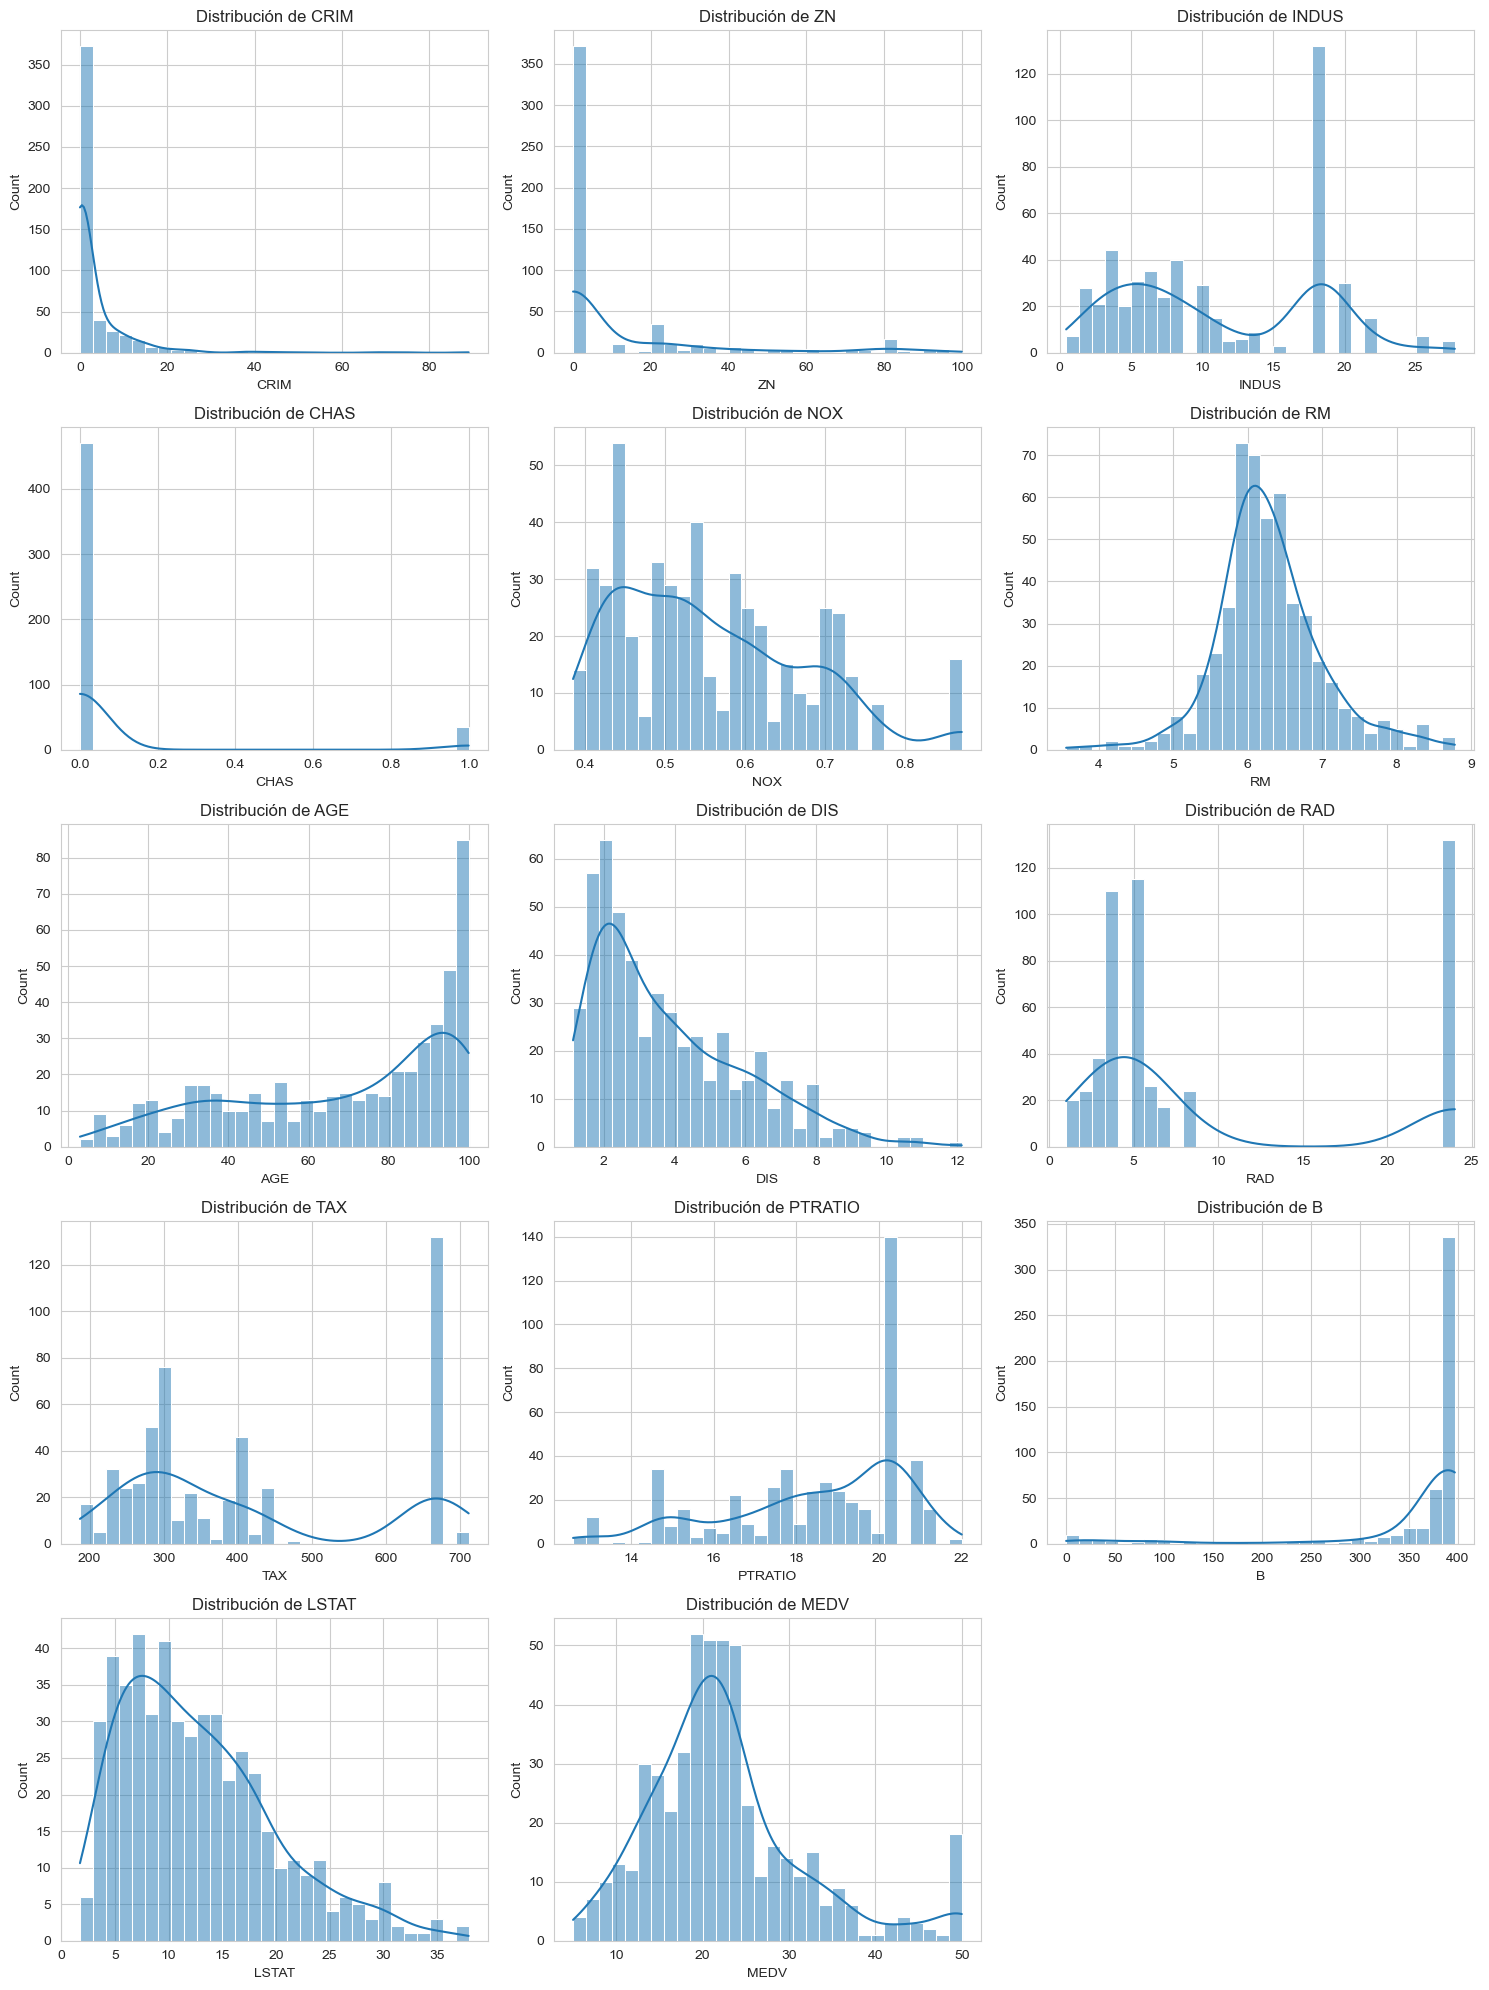

In [62]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")

# Definir el número de columnas para los subgráficos
num_vars = len(df.columns)
num_cols = 3
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

# Crear los gráficos de distribución
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Aplanar los ejes para iterar más fácilmente
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribución de {col}')

# Eliminar ejes vacíos si existen
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

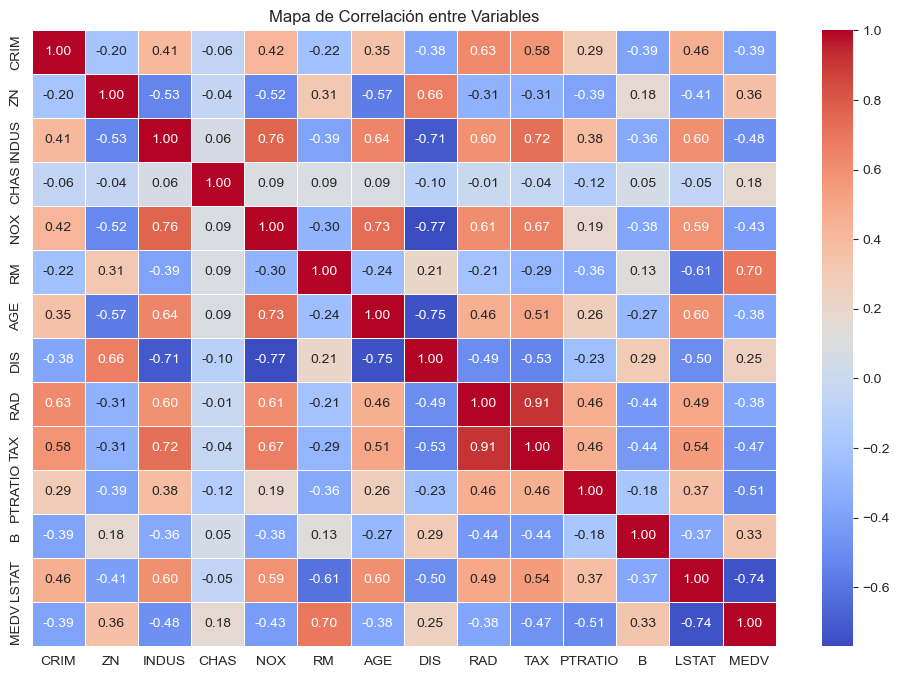

In [63]:
# Generar un heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación entre Variables")
plt.show()

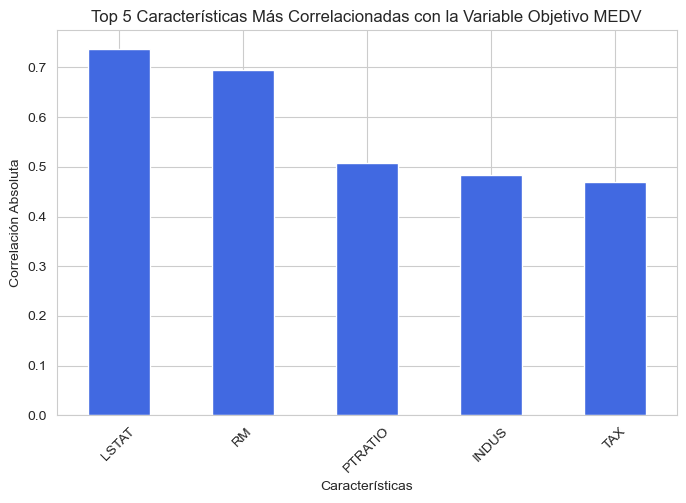

In [64]:
# Seleccionar las 5 características con mayor correlación con la variable objetivo "Price"
correlation = df.corr()["MEDV"].drop("MEDV").abs()  # Tomamos valores absolutos y eliminamos la correlación consigo misma
top_5_features = correlation.nlargest(5)

# Graficar las 5 características más correlacionadas con "Price"
plt.figure(figsize=(8, 5))
top_5_features.plot(kind="bar", color="royalblue")
plt.title("Top 5 Características Más Correlacionadas con la Variable Objetivo MEDV")
plt.xlabel("Características")
plt.ylabel("Correlación Absoluta")
plt.xticks(rotation=45)
plt.show()


In [65]:
# LSTAT: % de estatus inferior de la población
# RM: número medio de habitaciones por vivienda
# PTRATIO: ratio alumnos-profesor por ciudad
# INDUS: proporción de acres comerciales no minoristas por ciudad
# TAX: tipo del impuesto sobre bienes inmuebles por cada 10.000 /10k].

In [66]:
# Importar librerías necesarias
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionar solo las características predictoras (sin la variable objetivo)
X = df.drop(columns=["MEDV"])

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los valores de VIF
print(vif_data)

   Variable        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


## Determinemos si los datos requieren ser escalados 

In [68]:
# Función para evaluar si es necesario escalar los datos
def evaluar_escalado(df):
    resultados = pd.DataFrame()
    
    # Calcular coeficiente de variación (CV) y relación máximo/mínimo
    resultados["Media"] = df.mean()
    resultados["Desviación estándar"] = df.std()
    resultados["Coeficiente de variación (CV)"] = resultados["Desviación estándar"] / resultados["Media"]
    resultados["Máximo"] = df.max()
    resultados["Mínimo"] = df.min()
    resultados["Rango (Máx - Mín)"] = resultados["Máximo"] - resultados["Mínimo"]
    
    # Evaluación de necesidad de escalado
    cv_diferencia = resultados["Coeficiente de variación (CV)"].max() / resultados["Coeficiente de variación (CV)"].min()
    rango_diferencia = resultados["Rango (Máx - Mín)"].max() / resultados["Rango (Máx - Mín)"].min()
    
    print(resultados)
    
    if cv_diferencia > 10 or rango_diferencia > 100:
        print("\n🔴 Se recomienda escalar los datos (hay diferencias significativas entre las variables).")
    else:
        print("\n🟢 No es necesario escalar los datos (las variables tienen escalas similares).")

# Ejecutar la función en el dataset (sin la variable objetivo)
evaluar_escalado(df.drop(columns=["MEDV"]))


              Media  Desviación estándar  Coeficiente de variación (CV)  \
CRIM       3.613524             8.601545                       2.380376   
ZN        11.363636            23.322453                       2.052376   
INDUS     11.136779             6.860353                       0.616009   
CHAS       0.069170             0.253994                       3.672028   
NOX        0.554695             0.115878                       0.208903   
RM         6.284634             0.702617                       0.111799   
AGE       68.574901            28.148861                       0.410483   
DIS        3.795043             2.105710                       0.554858   
RAD        9.549407             8.707259                       0.911812   
TAX      408.237154           168.537116                       0.412841   
PTRATIO   18.455534             2.164946                       0.117306   
B        356.674032            91.294864                       0.255962   
LSTAT     12.653063      

## Paso 1: Dividir los datos en Train/Test y Escalar

In [70]:
# 1️⃣ Dividir los datos en train y test
RSTATE = 23124
X = df.drop(columns=['MEDV'], axis=1)  # Variables predictoras
y = df['MEDV']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RSTATE)

# 2️⃣ Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar X_train
X_test_scaled = scaler.transform(X_test)  # Transformar X_test con la misma escala

print(f"X_train escalado: {X_train_scaled.shape}")
print(f"X_test escalado: {X_test_scaled.shape}")

X_train escalado: (339, 13)
X_test escalado: (167, 13)


 # Paso 2: Aplicar PCA y Reducir Dimensionalidad

# Dada la alta colinealidad entre los datos vamos a aplicar Análisis de Componentes Principales PCA

### 🔹 Análisis de Componentes Principales (PCA)

El **Análisis de Componentes Principales (PCA)** es una técnica de reducción de dimensionalidad que permite transformar un conjunto de variables originales en un nuevo conjunto de variables llamadas **componentes principales (PCs)**. Estas nuevas variables son combinaciones lineales de las originales y están ordenadas según la cantidad de varianza que explican.

#### 📌 ¿Qué hace PCA?
1. **Estandariza los datos** para que todas las variables tengan la misma escala.
2. **Calcula combinaciones lineales** de las variables originales.
3. **Genera un nuevo conjunto de variables** llamadas **componentes principales** (`PC1`, `PC2`, ...).
4. **Permite reducir la cantidad de variables** sin perder mucha información.

#### ❌ **¿PCA transforma el DataFrame original?**
No. **PCA NO modifica el DataFrame original, sino que genera un nuevo objeto con los datos transformados.**  
El resultado de PCA es un **array de NumPy**, que puede convertirse en un nuevo **DataFrame** con nombres adecuados para los componentes principales:

```python
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])


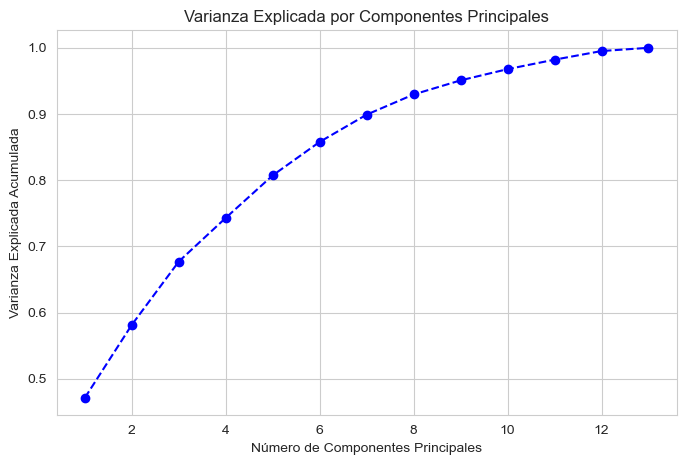

Varianza explicada acumulada por componente:
[0.47129606 0.581548   0.67713389 0.74310121 0.80731782 0.8578876
 0.89906884 0.92953786 0.9508412  0.96778257 0.98209137 0.99511467
 1.        ]


In [74]:
# Estandarizar las variables predictoras
scaler = StandardScaler() # dada la diferencia sigficativas entre las variables, vamos a escalar
X_scaled = scaler.fit_transform(X)  # X es el DataFrame sin la variable objetivo

# Aplicar PCA
pca = PCA(n_components=len(X.columns))  # Mantener todas las componentes para analizar varianza explicada
X_pca = pca.fit_transform(X_scaled)

# Obtener la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(X.columns) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid(True)
plt.show()

# Mostrar la varianza explicada por cada componente
print("Varianza explicada acumulada por componente:")
print(explained_variance_ratio)

In [75]:
# componentes explican al menos el 90% de la varianza:

In [76]:
n_componentes_optimos = np.argmax(explained_variance_ratio >= 0.90) + 1
print(f"Componentes óptimos seleccionados: {n_componentes_optimos}")

Componentes óptimos seleccionados: 8


In [77]:
# 1️⃣ Aplicar PCA solo con el número óptimo de componentes
pca_final = PCA(n_components=n_componentes_optimos)

# 2️⃣ Ajustar PCA solo con X_train_scaled y transformar X_train_scaled y X_test_scaled
X_train_pca = pca_final.fit_transform(X_train_scaled)  # Ajusta y transforma solo X_train
X_test_pca = pca_final.transform(X_test_scaled)  # Transforma X_test con el mismo PCA

# 3️⃣ Convertir en DataFrame con nombres adecuados
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(n_componentes_optimos)], index=X_train.index)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f"PC{i+1}" for i in range(n_componentes_optimos)], index=X_test.index)

# 4️⃣ Mostrar la nueva forma de los DataFrames
print(f"Dimensión de X_train después de PCA: {X_train_pca_df.shape}")
print(f"Dimensión de X_test después de PCA: {X_test_pca_df.shape}")
print(X_train_pca_df.head())  # Ver las primeras filas

Dimensión de X_train después de PCA: (339, 8)
Dimensión de X_test después de PCA: (167, 8)
          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
353 -4.744755  2.639735  0.609161  1.054323  0.540154 -0.726594 -0.274380   
132  1.367796 -1.050024 -0.693874 -0.704626 -0.907298 -0.163243 -0.644401   
198 -4.268685  1.155193  1.788098  0.119503  1.686858 -1.150757 -0.010066   
463  2.483864 -0.055919  0.776626 -0.510473 -1.244971 -1.318515 -0.380811   
54  -2.066954  2.395178 -0.886633  1.212425 -0.398344 -0.609337 -0.182102   

          PC8  
353  1.351497  
132  0.804630  
198  0.509342  
463 -0.053419  
54   1.659264  


# Modelo OLS ( Minimos couadrados ordinarios con PCA)

In [79]:
# 2️⃣ Agregar una constante para el intercepto en el modelo OLS (statsmodels no lo agrega automáticamente)
X_train_pca_const = sm.add_constant(X_train_pca)
X_test_pca_const = sm.add_constant(X_test_pca)

# 3️⃣ Ajustar el modelo OLS con statsmodels
model_ols_sm = sm.OLS(y_train, X_train_pca_const).fit()

# 4️⃣ Mostrar el resumen completo del modelo
print(model_ols_sm.summary())

# 5️⃣ Hacer predicciones en el conjunto de prueba
y_pred = model_ols_sm.predict(X_test_pca_const)

# 6️⃣ Evaluar el modelo con métricas estándar
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 7️⃣ Mostrar resultados de evaluación
print("\n🔹 Evaluación del Modelo OLS con PCA 🔹")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     91.02
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           8.11e-79
Time:                        18:00:11   Log-Likelihood:                -1032.1
No. Observations:                 339   AIC:                             2082.
Df Residuals:                     330   BIC:                             2117.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9372      0.280     81.997      0.0

In [98]:
# Predicho vs Real 

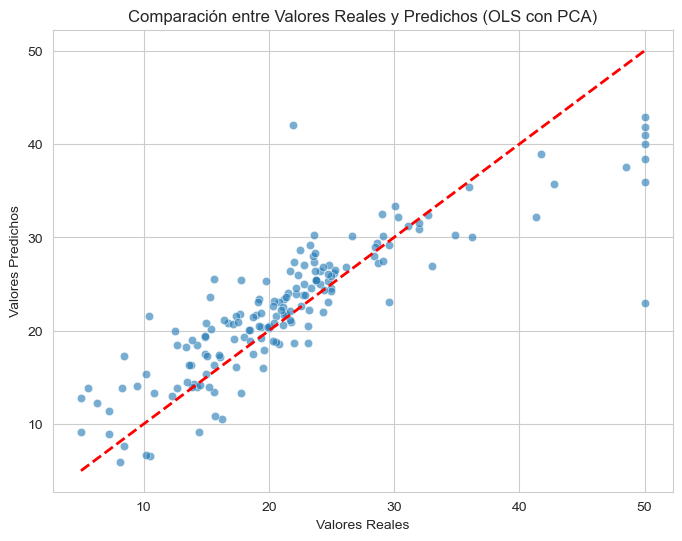

In [100]:
# Crear gráfico de valores reales vs predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Línea de referencia ideal (y=x)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos (OLS con PCA)")
plt.grid(True)
plt.show()

 # Modelo Decision Tree Regressor

Uso de Datos Escalados en Decision Tree Regressor
En este análisis, utilizamos una base de datos en la que las variables predictoras han sido escaladas con StandardScaler(). Sin embargo, surge la duda de si es necesario "desescalar" los datos antes de aplicar un modelo de Decision Tree Regressor.

La respuesta es NO, no es necesario desescalar los datos.
Los árboles de decisión no dependen de la escala de las variables, ya que no utilizan operaciones basadas en distancias o gradientes (como lo hacen los modelos de regresión lineal o SVM). En su lugar, los árboles de decisión trabajan dividiendo los datos en base a umbrales específicos en cada variable.

Por lo tanto, aunque los datos estén escalados, Decision Tree Regressor seguirá funcionando de la misma manera. La única diferencia será que los valores de los nodos internos estarán en la escala transformada, pero esto no afecta su rendimiento.

 ¿Cómo funciona Decision Tree Regressor?
El Decision Tree Regressor es un modelo basado en reglas de decisión que sigue este procedimiento:

Selecciona la mejor variable de división: Evalúa todas las variables y elige la que mejor separa los datos en términos de reducción de varianza.
Divide los datos en función de un umbral: Crea ramas según los valores de la variable seleccionada.
Repite el proceso recursivamente: Cada subconjunto de datos se sigue dividiendo hasta alcanzar un criterio de detención (por ejemplo, una profundidad máxima del árbol o un número mínimo de muestras por nodo).
Asigna un valor de predicción: En cada hoja del árbol, la predicción se basa en el promedio de los valores de la variable objetivo (y_train) en ese nodo.
Debido a esta naturaleza basada en divisiones en umbrales, los árboles de decisión no se ven afectados por la escala de los datos, a diferencia de modelos como Regresión Lineal, SVM o KNN, que dependen de distancias.

🔹 Evaluación del Modelo Decision Tree Regressor 🔹
Error Cuadrático Medio (MSE): 31.6146
Coeficiente de Determinación (R²): 0.6353


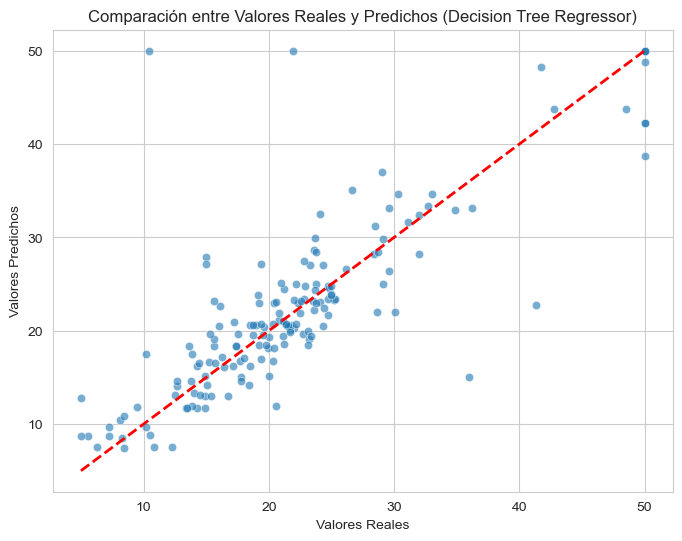

In [109]:
# 1️⃣ Crear el modelo Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# 2️⃣ Entrenar el modelo con los datos escalados
tree_reg.fit(X_train_scaled, y_train)

# 3️⃣ Hacer predicciones en el conjunto de prueba
y_pred = tree_reg.predict(X_test_scaled)

# 4️⃣ Evaluar el modelo con MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5️⃣ Mostrar resultados
print("🔹 Evaluación del Modelo Decision Tree Regressor 🔹")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# 6️⃣ Graficar Valores Reales vs. Predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Línea ideal (y=x)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos (Decision Tree Regressor)")
plt.grid(True)
plt.show()

# DecisionTreeRegressor Código Mejorado para Optimización de Hiperparámetros

Fitting 5 folds for each of 120 candidates, totalling 600 fits

🔹 Mejores Hiperparámetros Encontrados:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

🔹 Evaluación del Modelo Optimizado:
Error Cuadrático Medio (MSE): 24.1051
Coeficiente de Determinación (R²): 0.7220


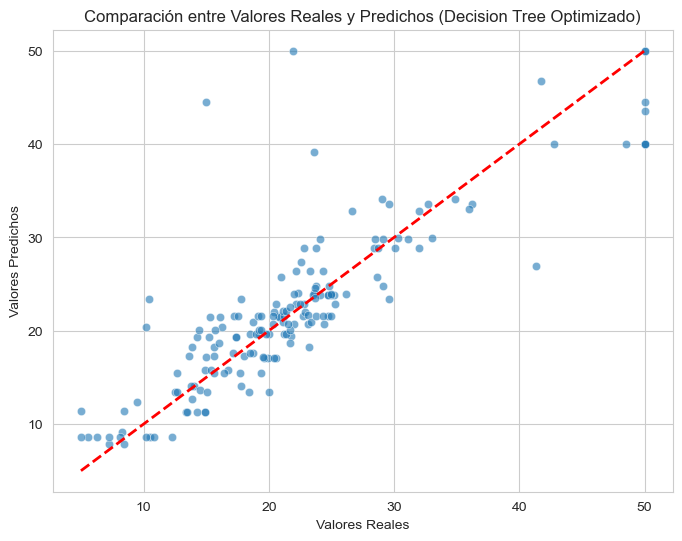

In [116]:
# 1️⃣ Definir una grilla más amplia de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],  # Más valores para la profundidad del árbol
    'min_samples_split': [2, 5, 10, 20],  # Más opciones para dividir nodos
    'min_samples_leaf': [1, 2, 4, 8, 10]  # Variación en el mínimo de muestras por hoja
}

# 2️⃣ Crear el modelo Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# 3️⃣ Configurar GridSearch con validación cruzada más eficiente
grid_search = GridSearchCV(
    tree_reg,
    param_grid,
    cv=5,  # Validación cruzada en 5 partes
    scoring='neg_mean_squared_error',  # Usamos MSE negativo como métrica
    n_jobs=-1,  # Paralelización para acelerar el proceso
    verbose=2  # Nivel de detalle en la ejecución
)

# 4️⃣ Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# 5️⃣ Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
best_tree_reg = grid_search.best_estimator_

# 6️⃣ Hacer predicciones con el mejor modelo
y_pred_best = best_tree_reg.predict(X_test_scaled)

# 7️⃣ Evaluar el modelo optimizado
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# 8️⃣ Mostrar resultados de optimización
print("\n🔹 Mejores Hiperparámetros Encontrados:")
print(best_params)
print("\n🔹 Evaluación del Modelo Optimizado:")
print(f"Error Cuadrático Medio (MSE): {mse_best:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_best:.4f}")

# 9️⃣ Graficar Valores Reales vs. Predichos con el modelo optimizado
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Línea ideal (y=x)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos (Decision Tree Optimizado)")
plt.grid(True)
plt.show()

# Evalúa múltiples modelos de regresión:

Regresión Lineal
Árbol de Decisión
SVM con kernel RBF y Sigmoid
Random Forest
Gradient Boosting


Evaluación y Selección de Modelos de Regresión para Predicción de Precios de Viviendas
Objetivo
El objetivo de este análisis es evaluar distintos modelos de regresión para predecir el precio mediano de viviendas y seleccionar el modelo con mejor desempeño en términos de error y capacidad de generalización. Se analizará también la presencia de sobreajuste para garantizar la robustez del modelo seleccionado.

Metodología
Se entrenan y comparan varios modelos de regresión utilizando un conjunto de datos previamente procesado y escalado. La evaluación se realiza considerando métricas de desempeño en los conjuntos de entrenamiento y prueba. Se sigue la siguiente metodología:

Definición de modelos base:
Se consideran los siguientes modelos de regresión:

Regresión Lineal
Árbol de Decisión
Máquinas de Soporte Vectorial con kernel RBF y Sigmoid
Random Forest
Gradient Boosting
Entrenamiento y evaluación de modelos:
Cada modelo se entrena utilizando los datos escalados. Se realizan predicciones sobre los conjuntos de entrenamiento y prueba y se calculan las siguientes métricas:

Error Cuadrático Medio (MSE): mide la magnitud del error en las predicciones.
Coeficiente de Determinación (R²): indica la proporción de varianza explicada por el modelo.
Además, se calcula la diferencia entre el R² en entrenamiento y prueba para detectar posibles casos de sobreajuste.

Selección del mejor modelo:
Se selecciona el modelo con el mayor R² en el conjunto de prueba, asegurando que la diferencia con el R² en entrenamiento sea mínima para evitar sobreajuste.

Análisis del sobreajuste:
Se genera una visualización comparativa de la diferencia entre R² en entrenamiento y prueba para todos los modelos evaluados. Se considera que un modelo tiene sobreajuste si la diferencia entre R² en ambos conjuntos es superior a 0.1.

Visualización de predicciones:
Se genera un gráfico de dispersión comparando los valores reales y predichos para el mejor modelo. Se incluye una línea de referencia 
𝑦
=
𝑥
y=x que representa el caso ideal donde las predicciones coinciden exactamente con los valores reales. En caso de que el modelo seleccionado presente sobreajuste, se incorpora una advertencia en la visualización.

Resultados y Consideraciones
El análisis proporciona una visión clara del rendimiento de cada modelo y su capacidad de generalización. La combinación de métricas cuantitativas y visualización gráfica permite identificar el mejor modelo para la tarea de predicción, así como evaluar la necesidad de ajustes adicionales en su configuración.

En caso de que el modelo seleccionado presente sobreajuste significativo, se recomienda considerar estrategias como regularización, reducción de la complejidad del modelo o el uso de mayor cantidad de datos de entrenamiento.

Linear Regression - MSE Train: 22.3359 - MSE Test: 22.4308 - R² Train: 0.7302 - R² Test: 0.7413 - Diferencia R²: 0.0110
Decision Tree - MSE Train: 0.0000 - MSE Test: 31.6146 - R² Train: 1.0000 - R² Test: 0.6353 - Diferencia R²: 0.3647
SVR RBF - MSE Train: 28.6662 - MSE Test: 32.0101 - R² Train: 0.6538 - R² Test: 0.6308 - Diferencia R²: 0.0230
SVR Sigmoid - MSE Train: 34.8595 - MSE Test: 29.9892 - R² Train: 0.5790 - R² Test: 0.6541 - Diferencia R²: 0.0751
Random Forest - MSE Train: 1.6304 - MSE Test: 12.8991 - R² Train: 0.9803 - R² Test: 0.8512 - Diferencia R²: 0.1291
Gradient Boosting - MSE Train: 1.5199 - MSE Test: 12.5619 - R² Train: 0.9816 - R² Test: 0.8551 - Diferencia R²: 0.1265

✅ Mejor modelo seleccionado: Gradient Boosting
🔹 R² Train: 0.9816
🔹 R² Test: 0.8551
🔹 Diferencia R² (Sobreajuste): 0.1265
⚠️ Advertencia: El modelo tiene sobreajuste significativo. Se ajusta bien en entrenamiento pero mal en test.


C:\Users\franc\AppData\Local\Temp\ipykernel_2792\2545861835.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x="Diferencia R²", y="Modelo", palette="coolwarm", orient="h")


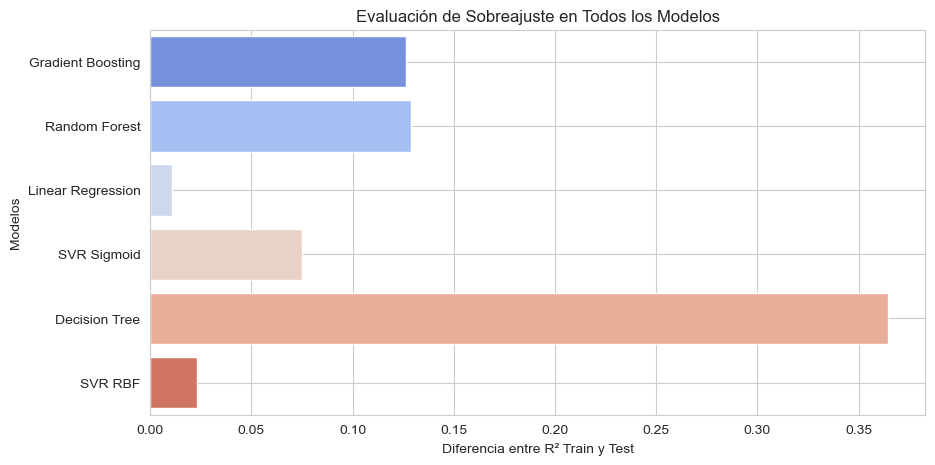

C:\Users\franc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\franc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


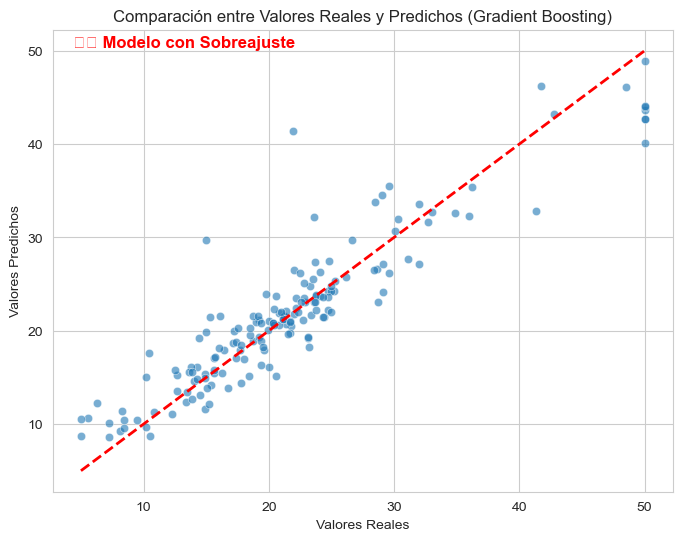

In [163]:
# 📌 Importar librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 1️⃣ Definir los modelos base para regresión
modelos = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVR RBF": SVR(kernel="rbf"),
    "SVR Sigmoid": SVR(kernel="sigmoid"),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# 📌 2️⃣ Evaluar modelos individuales y calcular R² en Train y Test
resultados = []
for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    
    y_train_pred = modelo.predict(X_train_scaled)
    y_test_pred = modelo.predict(X_test_scaled)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    r2_variance = abs(r2_train - r2_test)  # Diferencia entre Train y Test

    resultados.append([nombre, mse_train, mse_test, r2_train, r2_test, r2_variance])

    print(f"{nombre} - MSE Train: {mse_train:.4f} - MSE Test: {mse_test:.4f} - R² Train: {r2_train:.4f} - R² Test: {r2_test:.4f} - Diferencia R²: {r2_variance:.4f}")

# 📌 3️⃣ Crear DataFrame con los resultados
df_resultados = pd.DataFrame(resultados, columns=["Modelo", "MSE Train", "MSE Test", "R² Train", "R² Test", "Diferencia R²"])
df_resultados = df_resultados.sort_values(by="R² Test", ascending=False)  # Ordenar por mejor desempeño en Test

# 📌 4️⃣ Seleccionar el mejor modelo basado en R² Test
mejor_modelo = df_resultados.iloc[0]["Modelo"]
r2_train_mejor = df_resultados.iloc[0]["R² Train"]
r2_test_mejor = df_resultados.iloc[0]["R² Test"]
r2_variance_mejor = df_resultados.iloc[0]["Diferencia R²"]

print(f"\n✅ Mejor modelo seleccionado: {mejor_modelo}")
print(f"🔹 R² Train: {r2_train_mejor:.4f}")
print(f"🔹 R² Test: {r2_test_mejor:.4f}")
print(f"🔹 Diferencia R² (Sobreajuste): {r2_variance_mejor:.4f}")

# 📌 5️⃣ Advertencia si hay sobreajuste
if r2_variance_mejor > 0.1:
    print("⚠️ Advertencia: El modelo tiene sobreajuste significativo. Se ajusta bien en entrenamiento pero mal en test.")

# 📌 6️⃣ Gráfico de Barras para visualizar sobreajuste en TODOS los modelos
plt.figure(figsize=(10, 5))
sns.barplot(data=df_resultados, x="Diferencia R²", y="Modelo", palette="coolwarm", orient="h")
plt.xlabel("Diferencia entre R² Train y Test")
plt.ylabel("Modelos")
plt.title("Evaluación de Sobreajuste en Todos los Modelos")
plt.grid(True)
plt.show()

# 📌 7️⃣ Graficar Valores Reales vs. Predichos para el mejor modelo
modelo_final = modelos[mejor_modelo]
y_pred_test = modelo_final.predict(X_test_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Línea ideal (y=x)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(f"Comparación entre Valores Reales y Predichos ({mejor_modelo})")

# 📌 8️⃣ Mostrar advertencia en el gráfico si hay sobreajuste
if r2_variance_mejor > 0.1:
    plt.figtext(0.15, 0.85, "⚠️ Modelo con Sobreajuste", fontsize=12, color="red", fontweight="bold")

plt.grid(True)
plt.show()


# Random Forest Regressor (Bagging)


🔹 Desempeño del Modelo Random Forest (Bagging)
Error Cuadrático Medio (MSE): 12.7470
Coeficiente de Determinación (R²): 0.8530


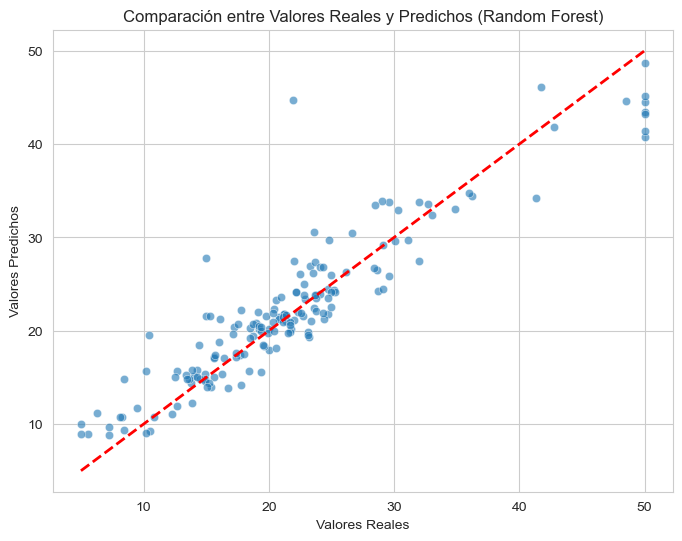

In [136]:
# 1️⃣ Definir y entrenar el modelo Random Forest
rf_regressor = RandomForestRegressor(
    n_estimators=200,  # 200 árboles en el ensamble
    max_depth=None,  # Permitir el crecimiento completo de los árboles
    min_samples_split=2,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=1,  # Mínimo de muestras en una hoja
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos del procesador
)

rf_regressor.fit(X_train_scaled, y_train)

# 2️⃣ Hacer predicciones con el modelo optimizado
y_pred_rf = rf_regressor.predict(X_test_scaled)

# 3️⃣ Evaluar el modelo Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 4️⃣ Mostrar resultados de optimización
print("\n🔹 Desempeño del Modelo Random Forest (Bagging)")
print(f"Error Cuadrático Medio (MSE): {mse_rf:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_rf:.4f}")

# 5️⃣ Graficar Valores Reales vs. Predichos con el modelo optimizado
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Línea ideal (y=x)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos (Random Forest)")
plt.grid(True)
plt.show()

#  Código: Optimización de Random Forest con GridSearchCV

Fitting 5 folds for each of 81 candidates, totalling 405 fits

🔹 Mejores Hiperparámetros Encontrados:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

🔹 Evaluación del Modelo Random Forest Optimizado:
Error Cuadrático Medio (MSE): 12.6567
Coeficiente de Determinación (R²): 0.8540


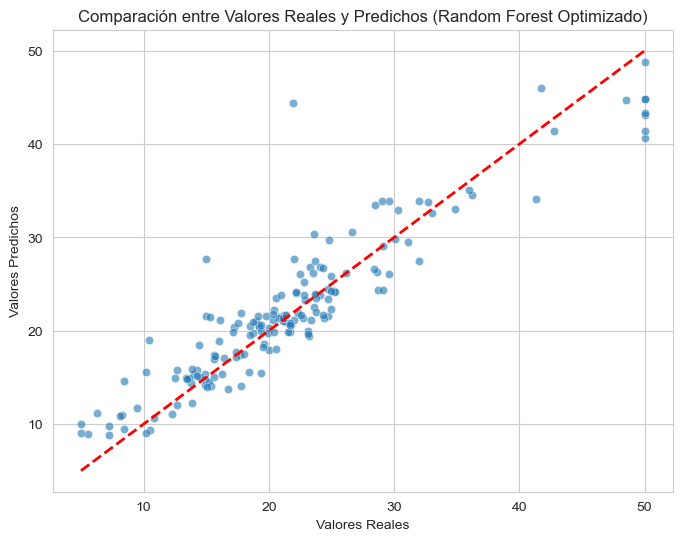

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, None],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Mínimo de muestras en una hoja
}

# 2️⃣ Crear el modelo Random Forest
rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

# 3️⃣ Configurar GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2
)

# 4️⃣ Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# 5️⃣ Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
best_rf_regressor = grid_search.best_estimator_

# 6️⃣ Hacer predicciones con el mejor modelo optimizado
y_pred_rf_best = best_rf_regressor.predict(X_test_scaled)

# 7️⃣ Evaluar el modelo optimizado
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

# 8️⃣ Mostrar resultados de optimización
print("\n🔹 Mejores Hiperparámetros Encontrados:")
print(best_params)
print("\n🔹 Evaluación del Modelo Random Forest Optimizado:")
print(f"Error Cuadrático Medio (MSE): {mse_rf_best:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_rf_best:.4f}")

# 9️⃣ Graficar Valores Reales vs. Predichos con el modelo optimizado
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Línea ideal (y=x)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos (Random Forest Optimizado)")
plt.grid(True)
plt.show()



### 📌 **Conclusiones antes de utilizar modelos más avanzados:**

| **Modelo**                          | **MSE**     | **R²**    |
|--------------------------------------|------------|-----------|
| **Regresión Lineal (OLS)**           | 23.8581    | 0.7248    |
| **Árbol de Decisión**                | 31.6146    | 0.6353    |
| **Árbol de Decisión (Optimizado)**   | 24.1051    | 0.7220    |
| **Random Forest (Bagging)**          | 12.7478    | 0.8530    |
| **Random Forest (Optimizado)**       | 12.6567    | 0.8540    |
| **Gradient Boosting (Bagging)**      | 12.2726    | 0.8584    |

---

### 🔎 **Observaciones Clave**:
✅ **La Regresión Lineal es insuficiente** (MSE alto, R² bajo).  
✅ **El Árbol de Decisión no fue efectivo en este problema.**  
✅ **Random Forest y Gradient Boosting han logrado los mejores resultados.**  
✅ **La diferencia entre Random Forest y Gradient Boosting es pequeña, pero Gradient Boosting ha sido el mejor modelo hasta ahora.**  

#### El análisis previo de modelos de regresión ha mostrado que Gradient Boosting ha sido el modelo con mejor desempeño en términos de precisión (R² = 0.8551) y error cuadrático medio (MSE = 12.5619). Sin embargo, presenta un grado considerable de sobreajuste (Diferencia R² = 0.1265), lo que indica que el modelo ajusta bien en el conjunto de entrenamiento, pero pierde capacidad de generalización en el conjunto de prueba.

#### Dado que XGBoost es una optimización del Gradient Boosting, su implementación es una opción lógica para mejorar el rendimiento del modelo. XGBoost incorpora regularización avanzada mediante L1 y L2, optimización del consumo de memoria y ejecución más eficiente en términos computacionales. Además, permite un ajuste más fino a través de hiperparámetros que controlan la profundidad de los árboles, la tasa de aprendizaje y el número de estimadores, lo que ayuda a mitigar el sobreajuste.

#### El objetivo de implementar XGBoost es entrenar un modelo inicial con hiperparámetros por defecto y compararlo con Gradient Boosting. Posteriormente, se optimizarán sus hiperparámetros para minimizar el sobreajuste y mejorar la capacidad de generalización del modelo. Finalmente, se evaluará su desempeño para determinar si logra mejorar la precisión en la predicción del precio de viviendas sin comprometer su estabilidad en datos nuevos.


# Entrenar y evaluar XGBoost


🔹 Evaluación del Modelo XGBoost (Hiperparámetros por Defecto)
Error Cuadrático Medio (MSE): 13.5619
Coeficiente de Determinación (R²): 0.8436


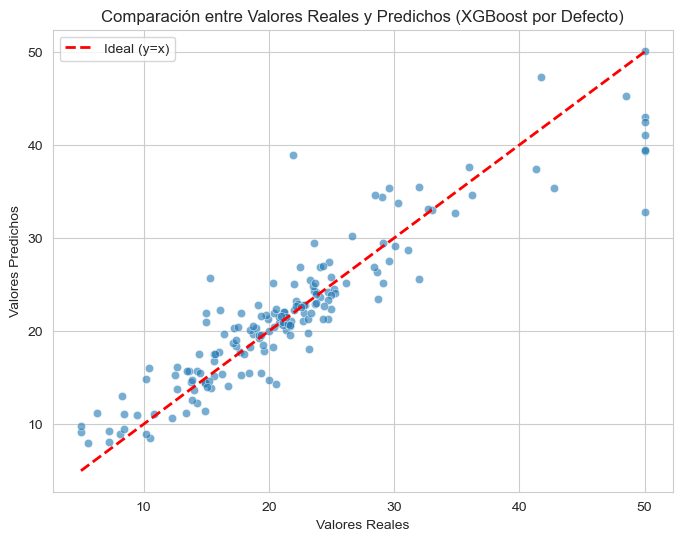

In [214]:
# Importar XGBoost
# 1️⃣ Definir el modelo XGBoost con hiperparámetros por defecto
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

# 2️⃣ Entrenar el modelo
xgb_regressor.fit(X_train_scaled, y_train)

# 3️⃣ Hacer predicciones en el conjunto de prueba
y_pred_xgb = xgb_regressor.predict(X_test_scaled)

# 4️⃣ Evaluar el modelo
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# 5️⃣ Mostrar resultados
print("\n🔹 Evaluación del Modelo XGBoost (Hiperparámetros por Defecto)")
print(f"Error Cuadrático Medio (MSE): {mse_xgb:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_xgb:.4f}")

# 6️⃣ Graficar Valores Reales vs. Predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label="Ideal (y=x)") 
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos (XGBoost por Defecto)")
plt.legend()
plt.grid(True)
plt.show()

In [218]:
# 1️⃣ Hacer predicciones en Train y Test
y_train_pred_xgb = xgb_regressor.predict(X_train_scaled)
y_test_pred_xgb = xgb_regressor.predict(X_test_scaled)

# 2️⃣ Evaluar el modelo en ambos conjuntos
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# 3️⃣ Mostrar los resultados
print("\n🔹 Evaluación del Modelo XGBoost (Hiperparámetros por Defecto)")
print(f"Error Cuadrático Medio en Train (MSE): {mse_train_xgb:.4f}")
print(f"Error Cuadrático Medio en Test (MSE): {mse_test_xgb:.4f}")
print(f"Coeficiente de Determinación en Train (R²): {r2_train_xgb:.4f}")
print(f"Coeficiente de Determinación en Test (R²): {r2_test_xgb:.4f}")

# 4️⃣ Evaluar posible sobreajuste
r2_variance_xgb = abs(r2_train_xgb - r2_test_xgb)
print(f"Diferencia R² (Sobreajuste): {r2_variance_xgb:.4f}")


🔹 Evaluación del Modelo XGBoost (Hiperparámetros por Defecto)
Error Cuadrático Medio en Train (MSE): 0.0001
Error Cuadrático Medio en Test (MSE): 13.5619
Coeficiente de Determinación en Train (R²): 1.0000
Coeficiente de Determinación en Test (R²): 0.8436
Diferencia R² (Sobreajuste): 0.1564


### Sobreajuste leve 0.1564

# Optimización de Hiperparámetros en XGBoost (optimización con GridSearchCV:) 

Fitting 5 folds for each of 768 candidates, totalling 3840 fits

🔹 Mejores Hiperparámetros Encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}

🔹 Evaluación del Modelo XGBoost Optimizado:
Error Cuadrático Medio (MSE): 9.9433
Coeficiente de Determinación (R²): 0.8853


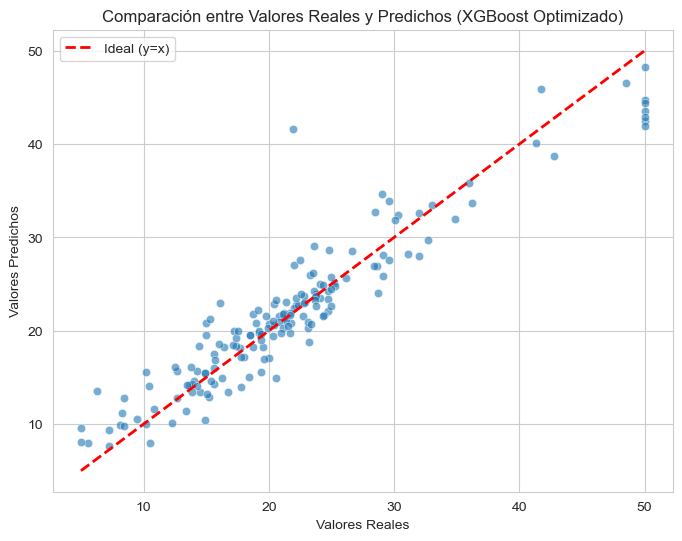

In [192]:
# Importar librerías necesarias
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Definir el modelo base de XGBoost
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],        # Número de árboles en el ensamble
    'max_depth': [3, 5, 7, 10],             # Profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.05, 0.1, 0.2],# Tasa de aprendizaje
    'subsample': [0.7, 0.8, 0.9, 1.0],      # Proporción de muestras utilizadas
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]# Proporción de características usadas
}

# Configurar la búsqueda con GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid,
    scoring='r2',        # Evaluar en base al coeficiente de determinación
    cv=5,                # Validación cruzada con 5 particiones
    n_jobs=-1,           # Usar todos los núcleos del procesador
    verbose=1            # Mostrar progreso de la búsqueda
)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("\n🔹 Mejores Hiperparámetros Encontrados:")
print(best_params)

# Entrenar XGBoost con los mejores hiperparámetros
xgb_best = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
xgb_best.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_xgb_best = xgb_best.predict(X_test_scaled)

# Evaluar el modelo optimizado
mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

print("\n🔹 Evaluación del Modelo XGBoost Optimizado:")
print(f"Error Cuadrático Medio (MSE): {mse_xgb_best:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_xgb_best:.4f}")

# Graficar Valores Reales vs. Predichos con XGBoost Optimizado
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgb_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label="Ideal (y=x)") 
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos (XGBoost Optimizado)")
plt.legend()
plt.grid(True)
plt.show()

In [222]:
# 1️⃣ Hacer predicciones en Train y Test con el modelo optimizado ya entrenado
y_train_pred_xgb = xgb_best.predict(X_train_scaled)
y_test_pred_xgb = xgb_best.predict(X_test_scaled)

# 2️⃣ Evaluar el modelo en ambos conjuntos
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# 3️⃣ Evaluar posible sobreajuste
r2_variance_xgb = abs(r2_train_xgb - r2_test_xgb)

# 4️⃣ Mostrar resultados
print("\n🔹 Evaluación del Sobreajuste en XGBoost Optimizado")
print(f"R² Train: {r2_train_xgb:.4f}")
print(f"R² Test: {r2_test_xgb:.4f}")
print(f"Diferencia R² (Sobreajuste): {r2_variance_xgb:.4f}")


🔹 Evaluación del Sobreajuste en XGBoost Optimizado
R² Train: 0.9964
R² Test: 0.8853
Diferencia R² (Sobreajuste): 0.1111


In [236]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el modelo base de XGBoost
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir el espacio de búsqueda de hiperparámetros con regularización
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],  
    'reg_lambda': [1, 2, 5, 10]  
}

# Configurar validación cruzada con shuffle
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid,
    scoring='r2',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Agregar eval_metric directamente en los hiperparámetros
best_params["eval_metric"] = "rmse"

print("\n🔹 Mejores Hiperparámetros Encontrados:")
print(best_params)

# Entrenar XGBoost con los mejores hiperparámetros y early stopping
xgb_best = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)

# Usar `evals` en lugar de `evals_result`
xgb_best.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],  # Necesario para early stopping
    early_stopping_rounds=10,  # Funciona solo si eval_set está presente
    verbose=True
)

# Hacer predicciones
y_pred_xgb_best = xgb_best.predict(X_test_scaled)

# Evaluar el modelo
mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

print("\n🔹 Evaluación del Modelo XGBoost Optimizado:")
print(f"Error Cuadrático Medio (MSE): {mse_xgb_best:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_xgb_best:.4f}")

# Graficar Valores Reales vs. Predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgb_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label="Ideal (y=x)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos (XGBoost Optimizado)")
plt.legend()
plt.grid(True)
plt.show()



Fitting 5 folds for each of 9216 candidates, totalling 46080 fits

🔹 Mejores Hiperparámetros Encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.7, 'eval_metric': 'rmse'}


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'